<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%E2%80%93_%D0%B3%D1%80%D0%B0%D1%85_%D0%BE%D1%82_25_%D0%B3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
# PARAMETERS
#csv_file = '/content/gr_chl_240813_all.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv

import pandas as pd
import numpy as np

import os

# Get the list of files in the current directory
files = os.listdir('.')

# Find the CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]

file_name_type = csv_file.split('_')[1]
print (csv_file, file_name_type)

export_ps_250609_al.csv ps


In [137]:
def try_read_csv(delimiter):
    df = pd.read_csv(csv_file, delimiter=delimiter, decimal='.', nrows=1, skiprows=5)
    if df.columns[0] != 'index':
        raise pd.errors.ParserError("Incorrect delimiter")
    return pd.read_csv(csv_file, delimiter=delimiter, decimal='.', skiprows=5, encoding='utf-8')  # Връща df, ако делимитерът е правилен

In [138]:
for delimiter in [';', '\t', ',']:
    try:
        df = try_read_csv(delimiter)
        break  # Излиза от цикъла, ако е намерен правилния делимитер
    except pd.errors.ParserError:
        pass  # Преминава към следващия делимитер
else:
    raise pd.errors.ParserError("Could not determine delimiter")  # Хвърля грешка, ако никой от делимитерите не е правилен

In [139]:
# обработка на csv файла, така че да се преобразува във вида, подходящ за ползване от кода
df.set_index('index', inplace=True)
df = df.T
df = df.reset_index()
df = df.rename(columns={'index': 'groups'})
df['groups'] = df['groups'].apply(lambda x: x.split('.')[0])
df = df[~df['groups'].str.contains('Unnamed')]
df = df.T

In [140]:
df = df.rename(columns=df.iloc[0])
df.drop(df.index[0], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,2_m,2_m,2_m,2_m,2_m,3_m,3_m,3_m,3_m,3_m,...,9_n,9_n,9_n,9_n,9_n,10_n,10_n,10_n,10_n,10_n
0,5.284,4.963,3.99,4.838,3.123,2.305,2.434,1.826,3.701,2.032,...,4.613,4.469,3.45,5.169,5.338,2.346,2.755,2.661,3.715,1.799


In [152]:
for v in df['2_m'].values:
    print(v)

[5.284 4.963 3.99 4.838 3.123]


=== ПРЕГЛЕД НА ДАННИТЕ ===
Размер на данните: (1, 66)

Първи няколко реда:
     2_m    2_m   2_m    2_m    2_m    3_m    3_m    3_m    3_m    3_m  ...  \
0  5.284  4.963  3.99  4.838  3.123  2.305  2.434  1.826  3.701  2.032  ...   

     9_n    9_n   9_n    9_n    9_n   10_n   10_n   10_n   10_n   10_n  
0  4.613  4.469  3.45  5.169  5.338  2.346  2.755  2.661  3.715  1.799  

[1 rows x 66 columns]

Колони:
['2_m', '2_m', '2_m', '2_m', '2_m', '3_m', '3_m', '3_m', '3_m', '3_m', '4_m', '4_m', '4_m', '4_m', '5_m', '5_m', '6_m', '6_m', '6_m', '7_m', '7_m', '7_m', '7_m', '8_m', '8_m', '8_m', '9_m', '9_m', '9_m', '10_m', '10_m', '10_m', '10_m', '10_m', '2_n', '2_n', '2_n', '3_n', '3_n', '3_n', '4_n', '4_n', '5_n', '5_n', '5_n', '6_n', '6_n', '6_n', '7_n', '7_n', '7_n', '7_n', '7_n', '8_n', '8_n', '8_n', '9_n', '9_n', '9_n', '9_n', '9_n', '10_n', '10_n', '10_n', '10_n', '10_n']

=== ПОДГОТОВКА НА ДАННИТЕ ЗА ANOVA ===
Намерени групи: ['2_m', '2_m', '2_m', '2_m', '2_m', '3_m', '3_m', '3_m', '3

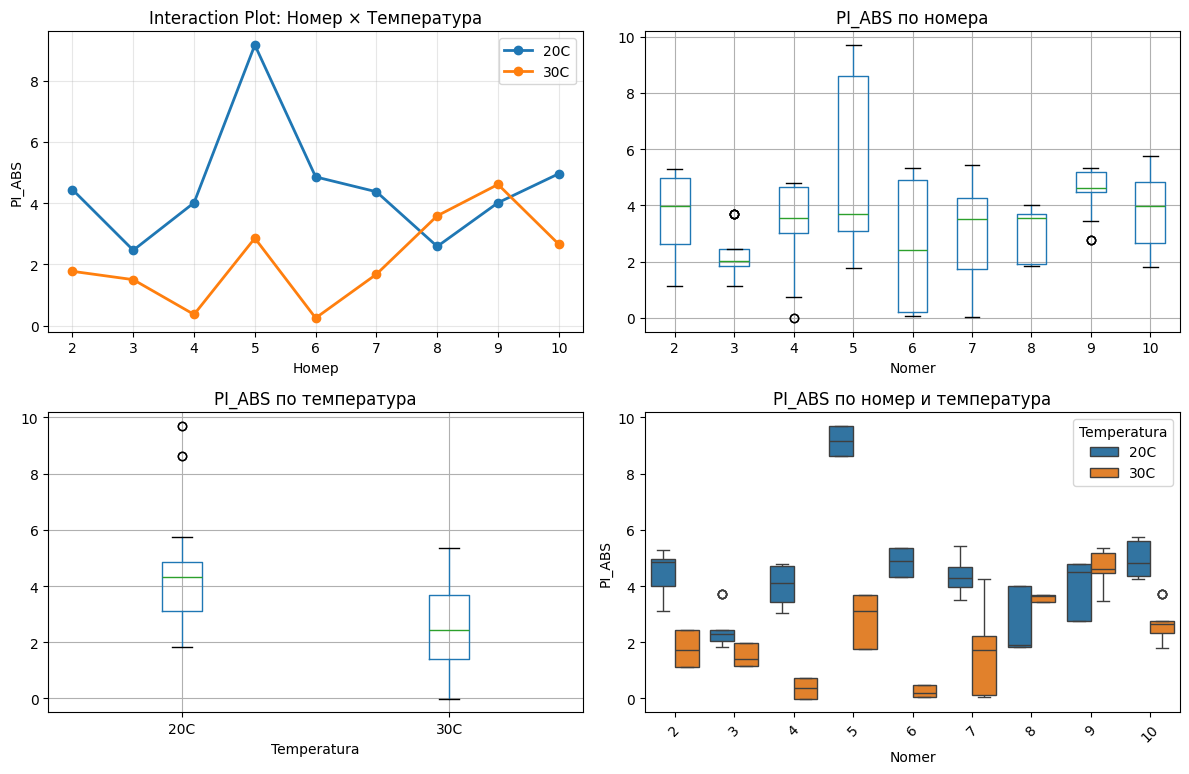


POST-HOC АНАЛИЗИ

🔍 ВЗАИМОДЕЙСТВИЕТО Е ЗНАЧИМО - правим отделни анализи:

--- АНАЛИЗ ЗА 20C ---
One-way ANOVA за 20C: p = 0.0000
✅ Значими разлики между номерата при 20C

Tukey HSD резултати за 20C:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     2      3    -1.98    0.0 -2.6422 -1.3178   True
     2      4  -0.4296 0.6767 -1.1792    0.32  False
     2      5   4.7199    0.0   3.459  5.9808   True
     2      6   0.4147  0.881 -0.4954  1.3249  False
     2      7  -0.0708    1.0 -0.8204  0.6787  False
     2      8  -1.8559    0.0 -2.7661 -0.9458   True
     2      9  -0.4279 0.8612 -1.3381  0.4822  False
     2     10   0.5184 0.2566 -0.1438  1.1806  False
     3      4   1.5504    0.0  0.8008     2.3   True
     3      5   6.6999    0.0   5.439  7.9608   True
     3      6   2.3947    0.0  1.4846  3.3049   True
     3      7   1.9092    0.0  1.1596  2.6587   True
     

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')
"""
# Зареждане на данните
def load_csv_data():
    try:
        # Четене чрез window.fs API
        #file_content = window.fs.readFile('export_ps_250609_al.csv', {'encoding': 'utf8'})

        # Парсване на CSV съдържанието
        #lines = df.split('\n')

        # Първия ред е header
        headers = lines[0].split(',')

        # Останалите редове са данни
        data_rows = []
        for line in lines[1:]:
            if line.strip():  # Пропускаме празни редове
                data_rows.append(line.split(','))

        # Създаваме DataFrame
        df = pd.DataFrame(data_rows, columns=headers)

        # Конвертираме числовите колони
        for col in df.columns:
            if col != headers[0]:  # Предполагаме първата колона е с имена на групите
                try:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
                except:
                    pass

        return df

    except Exception as e:
        print(f"Грешка при зареждане на данните: {e}")
        return None
"""
    # Зареждаме данните
#df = load_csv_data()

if df is not None:
    print("=== ПРЕГЛЕД НА ДАННИТЕ ===")
    print("Размер на данните:", df.shape)
    print("\nПърви няколко реда:")
    print(df.head())
    print("\nКолони:")
    print(df.columns.tolist())

    # Подготовка на данните за анализ
    print("\n=== ПОДГОТОВКА НА ДАННИТЕ ЗА ANOVA ===")

    # Предполагаме, че данните са в широк формат - всяка колона е различна група
    # Трябва да ги преобразуваме в дълъг формат

    # Идентифицираме групите
    group_columns = [col for col in df.columns if '_' in col]  # Колони от тип "2_m", "2_n", etc.

    print(f"Намерени групи: {group_columns}")

    # Преобразуваме в дълъг формат
    melted_data = []

    for col in group_columns:
        # Извличаме номера и времето
        parts = col.split('_')
        nomer = parts[0]
        time_code = parts[1]

        # m = morning (20°C), n = noon (30°C)
        temperatura = '20C' if time_code == 'm' else '30C'
        time_label = 'morning' if time_code == 'm' else 'noon'

        # Добавяме данните
        for value in df[col].values: #.dropna():
          for i in value:
            #for j in i:
            melted_data.append({
                'Nomer': int(nomer),
                'Temperatura': temperatura,
                'Time': time_label,
                'Time_code': time_code,
                'PI_ABS': float(i),
                'Group': col
            })

    # Създаваме новия DataFrame
    df_long = pd.DataFrame(melted_data)

    print(f"Данни след преобразуване: {df_long.shape[0]} наблюдения")
    print("\nПреглед на преобразуваните данни:")
    print(df_long.head(10))

    print("\nРазпределение на данните:")
    print(df_long.groupby(['Nomer', 'Temperatura']).size().unstack(fill_value=0))

    # ============== TWO-WAY ANOVA АНАЛИЗ ==============
    print("\n" + "="*50)
    print("TWO-WAY ANOVA АНАЛИЗ")
    print("="*50)

    # Проверяваме дали имаме достатъчно данни
    if len(df_long) > 0:
        # Two-way ANOVA модел
        model = ols('PI_ABS ~ C(Nomer) * C(Temperatura)', data=df_long).fit()
        anova_results = sm.stats.anova_lm(model, typ=2)

        print("\nTwo-way ANOVA резултати:")
        print(anova_results)

        # Интерпретация на резултатите
        print("\n=== ИНТЕРПРЕТАЦИЯ ===")

        # Главни ефекти
        p_nomer = anova_results.loc['C(Nomer)', 'PR(>F)']
        p_temperatura = anova_results.loc['C(Temperatura)', 'PR(>F)']
        p_interaction = anova_results.loc['C(Nomer):C(Temperatura)', 'PR(>F)']

        print(f"\n1. ГЛАВЕН ЕФЕКТ НА НОМЕРА: p = {p_nomer:.4f}")
        if p_nomer < 0.05:
            print("   ✅ ЗНАЧИМ! Има разлики между номерата")
        else:
            print("   ❌ НЕ Е ЗНАЧИМ. Няма значими разлики между номерата")

        print(f"\n2. ГЛАВЕН ЕФЕКТ НА ТЕМПЕРАТУРАТА: p = {p_temperatura:.4f}")
        if p_temperatura < 0.05:
            print("   ✅ ЗНАЧИМ! Има разлика между 20°C и 30°C")
        else:
            print("   ❌ НЕ Е ЗНАЧИМ. Няма значима разлика между температурите")

        print(f"\n3. ВЗАИМОДЕЙСТВИЕ (Номер × Температура): p = {p_interaction:.4f}")
        if p_interaction < 0.05:
            print("   ✅ ЗНАЧИМО! Ефектът на номера зависи от температурата")
            print("   → Това означава, че различните номера реагират по различен начин на температурата")
            print("   → Препоръчвам отделни анализи за всяка температура")
        else:
            print("   ❌ НЕ Е ЗНАЧИМО. Ефектът на номера е еднакъв при двете температури")

        # Средни стойности по групи
        print("\n=== СРЕДНИ СТОЙНОСТИ ===")
        means_table = df_long.groupby(['Nomer', 'Temperatura'])['PI_ABS'].agg(['mean', 'std', 'count']).round(3)
        print(means_table)

        # Visualizations
        print("\n=== СЪЗДАВАНЕ НА ГРАФИКИ ===")

        # 1. Interaction plot
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 2, 1)
        # Interaction plot
        means_pivot = df_long.groupby(['Nomer', 'Temperatura'])['PI_ABS'].mean().unstack()
        for temp in means_pivot.columns:
            plt.plot(means_pivot.index, means_pivot[temp], 'o-', label=temp, linewidth=2, markersize=6)
        plt.xlabel('Номер')
        plt.ylabel('PI_ABS')
        plt.title('Interaction Plot: Номер × Температура')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 2. Boxplot по номера
        plt.subplot(2, 2, 2)
        df_long.boxplot(column='PI_ABS', by='Nomer', ax=plt.gca())
        plt.title('PI_ABS по номера')
        plt.suptitle('')  # Премахваме автоматичния заглавие

        # 3. Boxplot по температура
        plt.subplot(2, 2, 3)
        df_long.boxplot(column='PI_ABS', by='Temperatura', ax=plt.gca())
        plt.title('PI_ABS по температура')
        plt.suptitle('')

        # 4. Комбинирана графика
        plt.subplot(2, 2, 4)
        sns.boxplot(data=df_long, x='Nomer', y='PI_ABS', hue='Temperatura')
        plt.title('PI_ABS по номер и температура')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # ============== POST-HOC АНАЛИЗИ ==============
        print("\n" + "="*50)
        print("POST-HOC АНАЛИЗИ")
        print("="*50)

        if p_interaction < 0.05:
            print("\n🔍 ВЗАИМОДЕЙСТВИЕТО Е ЗНАЧИМО - правим отделни анализи:")

            # Анализ за всяка температура поотделно
            for temp in ['20C', '30C']:
                print(f"\n--- АНАЛИЗ ЗА {temp} ---")
                temp_data = df_long[df_long['Temperatura'] == temp]

                if len(temp_data) > 0:
                    # One-way ANOVA за тази температура
                    model_temp = ols('PI_ABS ~ C(Nomer)', data=temp_data).fit()
                    anova_temp = sm.stats.anova_lm(model_temp, typ=2)
                    p_temp = anova_temp.loc['C(Nomer)', 'PR(>F)']

                    print(f"One-way ANOVA за {temp}: p = {p_temp:.4f}")

                    if p_temp < 0.05:
                        print(f"✅ Значими разлики между номерата при {temp}")

                        # Tukey post-hoc за тази температура
                        try:
                            tukey_temp = pairwise_tukeyhsd(temp_data['PI_ABS'],
                                                         temp_data['Nomer'],
                                                         alpha=0.05)
                            print(f"\nTukey HSD резултати за {temp}:")
                            print(tukey_temp)
                        except Exception as e:
                            print(f"Грешка при Tukey анализ: {e}")
                    else:
                        print(f"❌ Няма значими разлики между номерата при {temp}")

                    # Средни стойности за тази температура
                    temp_means = temp_data.groupby('Nomer')['PI_ABS'].agg(['mean', 'std', 'count'])
                    print(f"\nСредни стойности за {temp}:")
                    print(temp_means.round(3))

        else:
            print("\n🔍 ВЗАИМОДЕЙСТВИЕТО НЕ Е ЗНАЧИМО - правим общи post-hoc тестове:")

            # Ако главните ефекти са значими, правим post-hoc тестове
            if p_nomer < 0.05:
                print("\n--- TUKEY HSD ЗА НОМЕРА ---")
                try:
                    tukey_nomer = pairwise_tukeyhsd(df_long['PI_ABS'],
                                                  df_long['Nomer'],
                                                  alpha=0.05)
                    print(tukey_nomer)
                except Exception as e:
                    print(f"Грешка при Tukey анализ за номера: {e}")

            if p_temperatura < 0.05:
                print("\n--- СРАВНЕНИЕ НА ТЕМПЕРАТУРИТЕ ---")
                temp_means = df_long.groupby('Temperatura')['PI_ABS'].agg(['mean', 'std', 'count'])
                print(temp_means.round(3))

                # T-test между двете температури
                from scipy import stats
                temp_20 = df_long[df_long['Temperatura'] == '20C']['PI_ABS']
                temp_30 = df_long[df_long['Temperatura'] == '30C']['PI_ABS']

                if len(temp_20) > 0 and len(temp_30) > 0:
                    t_stat, t_p = stats.ttest_ind(temp_20, temp_30)
                    print(f"\nT-test между температурите: t = {t_stat:.3f}, p = {t_p:.4f}")

        # ============== ЗАКЛЮЧЕНИЯ И ПРЕПОРЪКИ ==============
        print("\n" + "="*50)
        print("ЗАКЛЮЧЕНИЯ И ПРЕПОРЪКИ")
        print("="*50)

        print("\n📊 РЕЗУЛТАТИ ОТ АНАЛИЗА:")
        print(f"• Главен ефект на номера: {'Значим' if p_nomer < 0.05 else 'Незначим'} (p = {p_nomer:.4f})")
        print(f"• Главен ефект на температурата: {'Значим' if p_temperatura < 0.05 else 'Незначим'} (p = {p_temperatura:.4f})")
        print(f"• Взаимодействие: {'Значимо' if p_interaction < 0.05 else 'Незначимо'} (p = {p_interaction:.4f})")

        print("\n💡 ПРЕПОРЪКИ ЗА ПРЕДСТАВЯНЕ:")
        if p_interaction < 0.05:
            print("• Представи отделните анализи за всяка температура")
            print("• Използвай interaction plots за визуализация")
            print("• Обясни как различните номера реагират различно на температурата")
        else:
            print("• Можеш да представиш общи главни ефекти")
            print("• Фокусирай се върху значимите ефекти")

        print("• Добави описателна статистика (средни ± SD)")
        print("• Използвай подходящи post-hoc тестове само за значимите ефекти")

    else:
        print("Няма валидни данни за анализ")

else:
    print("Неуспешно зареждане на данните")